In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Aim is to predict the marks of students of the test data

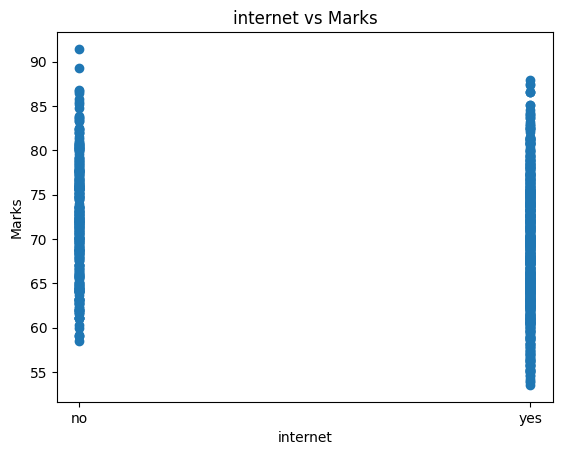

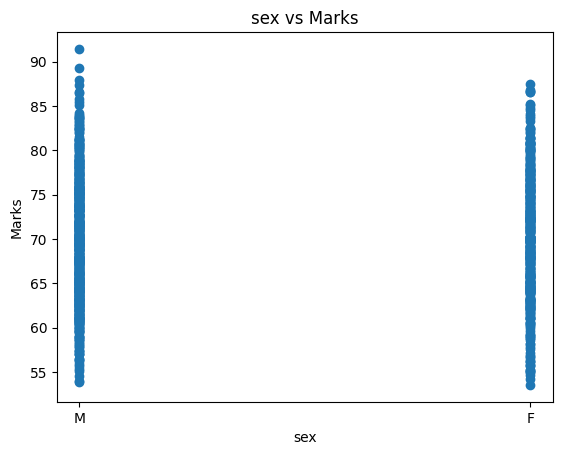

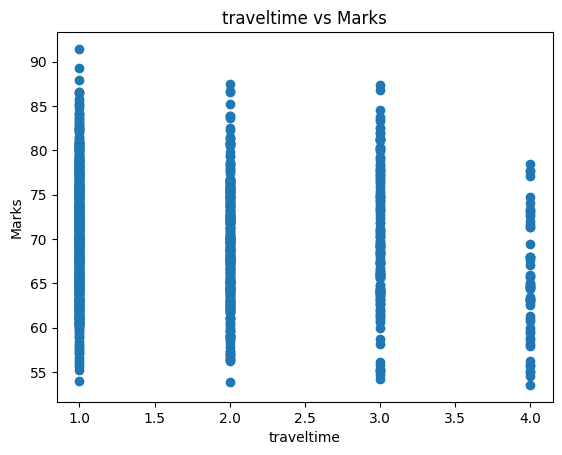

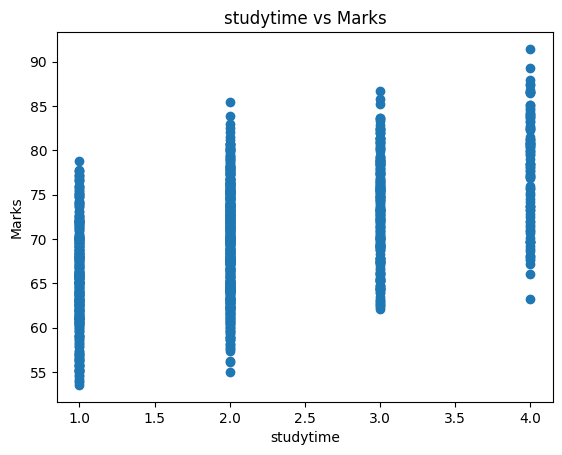

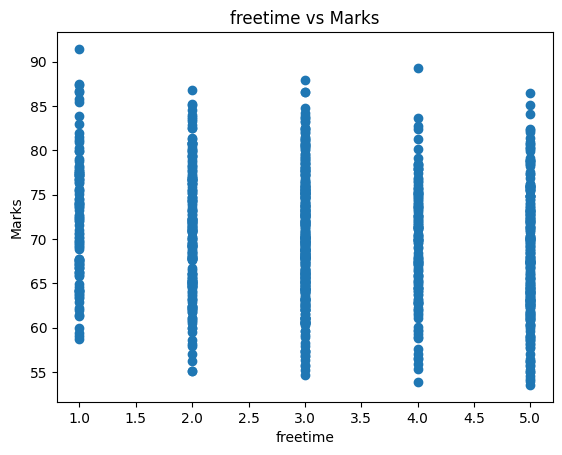

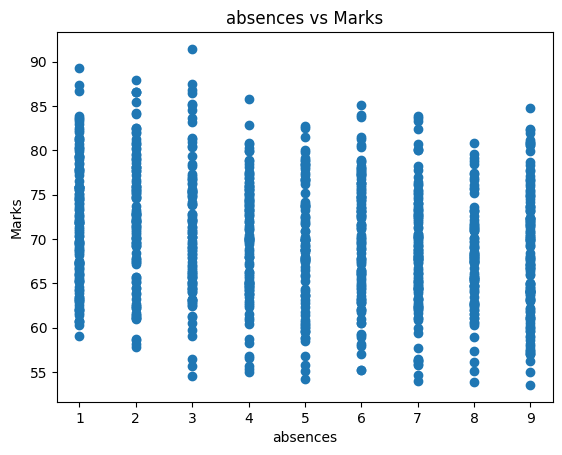

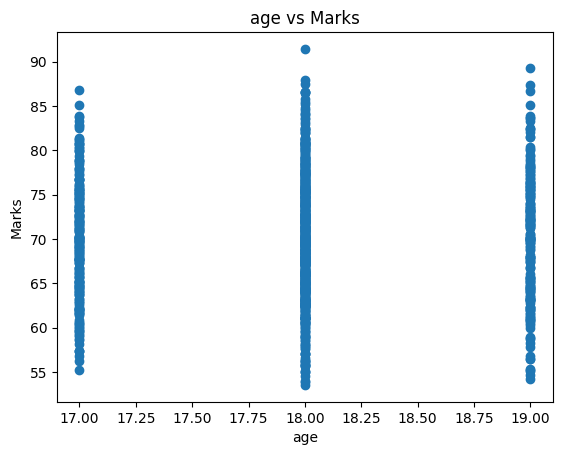

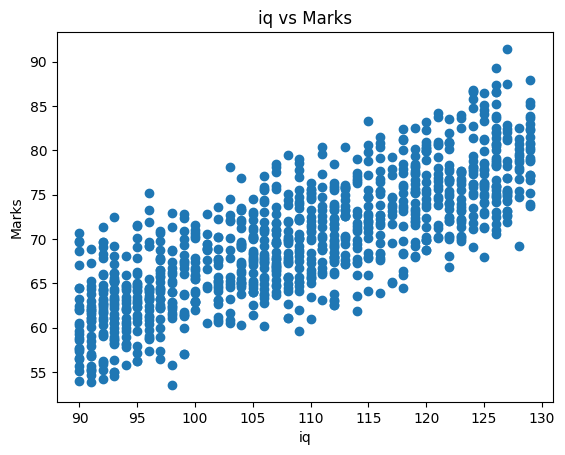

In [20]:
# Use the file named 'training data' to train the model

data = pd.read_excel('Training data.xlsx')
x_train = np.array(data.iloc[:,0:8])
y_train = np.array(data.iloc[:,8]).reshape(-1,1)

# Try plotting y_train with different features
# To get an idea whether to add some features or not
# Add some features if required in x_train
feature_names = ['internet', 'sex', 'traveltime', 'studytime', 'freetime', 'absences', 'age', 'iq']
for i, feature in enumerate(feature_names):
    plt.figure()
    plt.scatter(x_train[:, i], y_train)
    plt.xlabel(feature)
    plt.ylabel('Marks')
    plt.title(f'{feature} vs Marks')
    plt.show()
# Also do label encoding for features not represented in numbers
# refer the link if not know : https://youtu.be/589nCGeWG1w?si=t2Wa7LgbUOO4RooM

def feature_changing(x_train):
  # ---------
  for i in range(len(x_train[ : ,0])):
    if x_train[i, 0] == 'yes': x_train[i, 0]=1
    else: x_train[i, 0]=0
    if x_train[i, 1] == 'M': x_train[i, 1]=1
    else: x_train[i, 1]=0
  # ---------
  return x_train

x_train = feature_changing(x_train)

In [21]:
!pip install openpyxl


[notice] A new release of pip is available: 24.0 -> 24.1.1
[notice] To update, run: pip install --upgrade pip


In [22]:
def z_score(x_train):
  x_mean = x_train.mean()
  x_std = x_train.std()
  x_train = (x_train - x_mean) / x_std
  return x_train,x_std,x_mean

In [23]:
def compute_cost(x_train,y_train,w,b):
  m = len(y_train)

  predictions = np.dot(x_train, w) + b

  loss = np.sum((predictions - y_train) ** 2) / (2 * m)

  return loss

In [24]:
def compute_gradient(x, y, w, b):
  m = len(y)
  dj_dw = (1 / m) * x.T.dot(x.dot(w) + b - y)
  dj_db = (1 / m) * np.sum(x.dot(w) + b - y)
  return dj_dw, dj_db

def gradient_descent(x_train,y_train,w,b):
  for i in range(10000):
    dj_dw, dj_db = compute_gradient(x_train, y_train, w, b)

    w = w - 0.01 * dj_dw
    b = b - 0.01 * dj_db
  return w, b

In [25]:
x_train = x_train.astype(np.float64)
x_train,x_std,x_mean = z_score(x_train)

np.random.seed(2147483647)
w = np.random.randn(x_train.shape[1],1)
b = np.random.randn(1)

old_cost = 0

while abs(old_cost - compute_cost(x_train,y_train,w,b))>0.00001:
  old_cost = compute_cost(x_train,y_train,w,b)
  w,b = gradient_descent(x_train,y_train,w,b)

x_predict = pd.read_excel('Test data.xlsx').iloc[:,:8].to_numpy()
x_predict = feature_changing(x_predict)
x_predict = (x_predict - x_mean)/x_std

ans = pd.read_excel('Test data.xlsx').iloc[:,8].to_numpy()

y_predict = np.dot(x_predict,w) + b

accuracy = 0
for dim in range(len(ans)):
  if abs(y_predict[dim]-ans[dim])<0.5: # do not change the tolerance as you'll be checked on +- 0.5 error only
    accuracy += 1
accuracy = round(accuracy*100/200.0,2)
ok = 'Congratulations' if accuracy>95 else 'Optimization required'
print(f"{ok}, your accuracy is {accuracy}%")

Congratulations, your accuracy is 100.0%
